<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/Microsoft19thCenturyBooks/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports

import pandas as pd
# import json, os, shutil, codecs
import zipfile
import io
import urllib
import json

### Let us first have a look at metadata inside a **CSV / TSV file (small one)**:

In [0]:
# RUN this CELL if using BINDER or a LOCAL Jupyter Notebooks SERVER (see bellow for Google Colab)
# read metadata file #1 -- small TSV file

filename = "data/Microsoft-Books.zip"
df = pd.read_csv(filename, delimiter="\t", compression ="zip")

In [0]:
# RUN this CELL if using Google COLAB
# read metadata file #1 -- small TSV file

filename = "https://github.com/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/raw/master/Microsoft19thCenturyBooks/data/Microsoft-Books.zip"
df = pd.read_csv(filename, delimiter="\t", compression ="zip")

In [0]:
# number of records inside this file / dataframe

df.size

937004

In [0]:
# 1st 3 records

df.head(3)

,Physical Record ID,BL record ID,ARK,Type of resource,Content type,All names,Title,Country of publication,Place of publication,Publisher,Date of publication (standardised),Edition,Physical description,BL shelfmark,Topics,Genre,Literary form,Languages,Contents
0,4031040.0,14940086,ark:/81055/vdc_000000021AEC,Monograph,Text,"Żychliński, Ludwik [person]",Historya Sejmów Wielk. Ks. Poznańskiego do r. ...,NaN,Poznań,NaN,1867,NaN,2 tomes (8°),Digital Store 9475.cc.22,NaN,NaN,NaN,Polish,NaN
1,4031043.0,15178564,ark:/81055/vdc_000000025FF8,Monograph,Text,"Żychliński, Ludwik [person]",Pamiętniki z wojny Amerykańskiéj 1862 r,NaN,Poznań,NaN,1863,NaN,NaN,Digital Store 9603.f.3,NaN,NaN,NaN,Polish,NaN
2,4030703.0,14841678,ark:/81055/vdc_000000005322,Monograph,Text,"Rehn, A. [person] ; Zwiedinek Von Suedenhorst,...",Syrien und seine Bedeutung für den Welthandel....,NaN,Wien,NaN,1873,NaN,NaN,Digital Store 10077.f.1,NaN,NaN,NaN,German,NaN


In [0]:
df["Content type"].value_counts()

Text                         49314
Cartographic image ; Text        2
Name: Content type, dtype: int64

In [0]:
# Tops of Publication Dates

df["Date of publication (standardised)"].value_counts()

1897         1491
1896         1423
1895         1269
1893         1214
1890         1178
             ... 
1851-1873       1
1835-1836       1
1884-           1
2971            1
1893-           1
Name: Date of publication (standardised), Length: 418, dtype: int64

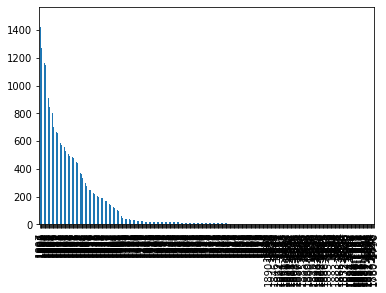

In [0]:
# ploting them with the default sort of the value counts -- not the best
df["Date of publication (standardised)"].value_counts().plot(kind='bar')

In [0]:
# another way to calculate the count of the number of records per date of publication -- this time sorting by value of the field, instead of the default counts value   

CountPerYear = pd.value_counts(df["Date of publication (standardised)"].values, sort=False).sort_index()
# equivalent to > CountPerYear = df["Date of publication (standardised)"].value_counts().sort_index()

CountPerYear

1180    1
1510    1
1528    1
1540    1
1556    1
       ..
1931    1
1938    1
1946    5
1949    1
2971    1
Length: 418, dtype: int64

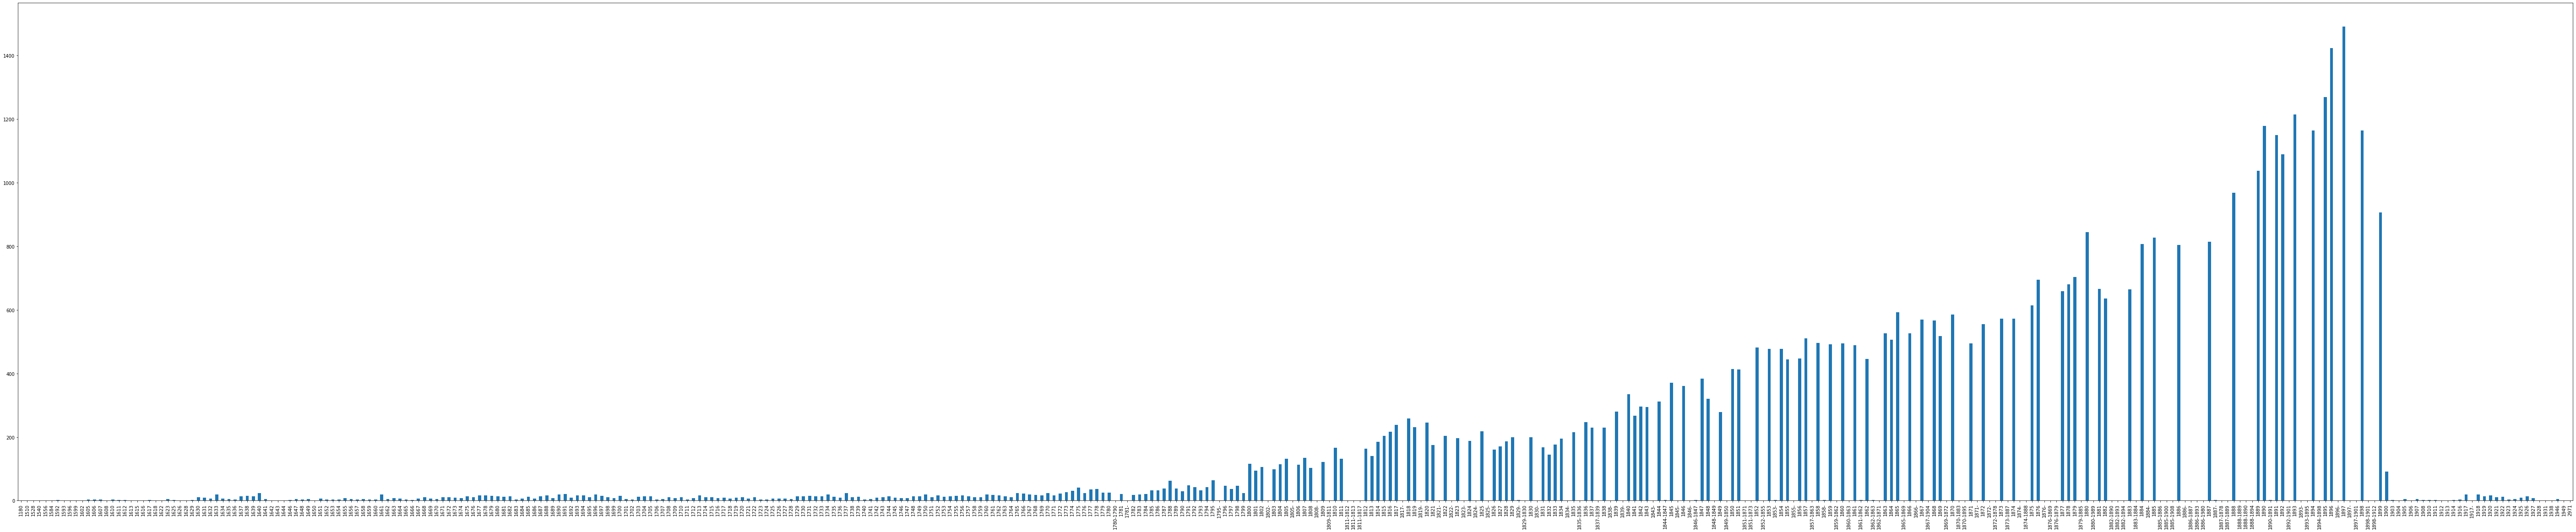

In [0]:
# ploting it now it allows to have a better view of the evolution over the years -- peak value: year 1897 = 1491 entries

CountPerYear.plot.bar(figsize=(100,20))

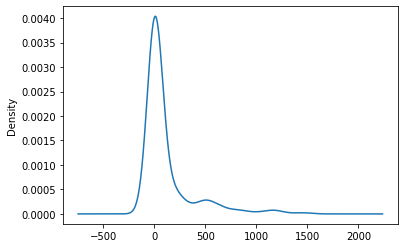

In [0]:
# Density plot (?)

CountPerYear.plot.kde()

In [0]:
# top of Genre

df["Genre"].value_counts()

Periodical                                               38
Directory                                                18
Fiction                                                  14
Source                                                    8
Biography                                                 7
Poetry or verse                                           5
Dictionary                                                5
Review                                                    4
Pictorial work                                            4
Libretto                                                  3
Guidebook                                                 3
Early works to 1800                                       3
Statistics                                                3
Drama                                                     2
Illustration                                              2
Atlas                                                     2
Travel                                  

In [0]:
# top of Literary form

df["Literary form"].value_counts()

Not fiction      298
Fiction          177
Poetry            27
Dramas            15
Novels            11
Short stories      5
Mixed forms        1
Letters            1
Name: Literary form, dtype: int64


### Let us check another metadata set inside a **JSON file (big one)**:


In [0]:
# RUN this CELL if using BINDER or a LOCAL Jupyter Notebooks SERVER (see bellow for Google Colab)
# read metadata file #2 (big JSON file -- book_data.json (52MB) inside book_data.zip (13MB))

filename = "data/book_data.zip"

# unzips the files inside book_data.zip
z = zipfile.ZipFile(filename)

In [0]:
# RUN this CELL if using Google COLAB
# read metadata file #2 (big JSON file -- book_data.json (52MB) inside book_data.zip (13MB))

zip_file = "https://github.com/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/raw/master/Microsoft19thCenturyBooks/data/book_data.zip"

# OR test loading it from data.bl.uk
# zip_file = "https://data.bl.uk/digbks/book_data.zip"

access_url = urllib.request.urlopen(zip_file)

# unzips the files inside book_data.zip
z = zipfile.ZipFile(io.BytesIO(access_url.read()))

In [0]:
# loads JSON from the first (only) file inside into a list 
meta = json.loads(z.read(z.infolist()[0]).decode('utf-8'))


In [0]:
# number of records inside this list

len(meta)

49509

In [0]:
# checking a ramdom record (#342)

meta[342]

{'authors': {'creator': ['AICKIN, Robert.']},
 'corporate': {},
 'date': '1890',
 'datefield': '1890',
 'edition': '',
 'flickr_url_to_book_images': 'http://www.flickr.com/photos/britishlibrary/tags/sysnum000033323',
 'identifier': '000033323',
 'imgs': {'0': {'000002': ['11294298083'],
   '000004': ['11295058696'],
   '000007': ['11116640094'],
   '000008': ['11202909965'],
   '000009': ['11206793353'],
   '000017': ['11115558733'],
   '000019': ['11115524535', '11115435123'],
   '000021': ['11114256935'],
   '000023': ['11114456165', '11117044754'],
   '000024': ['11114370245'],
   '000025': ['11115776723', '11116448223'],
   '000027': ['11294781816'],
   '000028': ['11117548493'],
   '000029': ['11116646896'],
   '000030': ['11114922533'],
   '000031': ['11114922566'],
   '000032': ['11114994984'],
   '000035': ['11206448996'],
   '000038': ['11204986556'],
   '000039': ['11204002115'],
   '000042': ['11116548993'],
   '000044': ['11296031935'],
   '000046': ['11206637743'],
   '000

### Let us check other metadata set inside **CSVs files (including a big one)**:

In [0]:
# read metadata file #3 (not MS Books, though -- big CSV file -- sherlock_flickr_tags.csv (27MB) + sherlocknet_tags_verbose.csv (207MB) inside sherlocknet_tags_csv.zip (44MB)), from BL Research Repository (British Library Labs: Projects | SherlockNet data, https://bl.iro.bl.uk/work/3205f8c5-f7dd-46fa-8bf4-9ac72f6fbb55)

zip_file = "https://s3.eu-west-2.amazonaws.com/importer.oar.bl.uk/bl/4ccd707f-eab9-4514-9fc3-17633274b17a"

access_url = urllib.request.urlopen(zip_file)

# unzips the files inside sherlocknet_tags_csv.zip
z = zipfile.ZipFile(io.BytesIO(access_url.read()))

In [0]:
# loads metadata from the sherlock_flickr_tags.csv (27MB) CSV file into a 1st dataframe
df1 = pd.read_csv(z.open('sherlock_flickr_tags.csv'))

In [0]:
# number of records inside this CSV / dataframe df1

df1.size

2910612

In [0]:
# 1st 3 records

df1.head(3)

,flickr_id,image_idx,tag
0,10997113773,0,seals
1,10997057664,1,miniatures
2,10996985576,2,miniatures


In [0]:
# what are the most popular tags?

df1['tag'].value_counts()

people          190561
landscapes      118816
architecture    104517
decorations      97256
nature           80060
objects          71544
maps             58460
animals          56232
diagrams         56086
seals            55720
text             45153
miniatures       35799
Name: tag, dtype: int64

In [0]:
# loads metadata from the sherlocknet_tags_verbose.csv (207MB) CSV file into a 2nd dataframe

df2 = pd.read_csv(z.open('sherlocknet_tags_verbose.csv'))

In [0]:
# number of records inside this 2nd CSV / dataframe df2
df2.size

12612652

In [0]:
# 1st 3 records

df2.head(3)

,image_idx,flickr_id,tag,size,scannumber,imageorderonpage,title,author,vol,pubplace,sysnum,date,filename
0,0,10997113773,seals,e,9,1,Piutarchi Chaeronensis Regum  Imperatorum Apo...,"REGIUS, Raphael.",0,Paris,2938347,1510,002938347_0_000009_1_
1,1,10997057664,miniatures,e,6,1,Piutarchi Chaeronensis Regum  Imperatorum Apo...,"REGIUS, Raphael.",0,Paris,2938347,1510,002938347_0_000006_1_
2,2,10996985576,miniatures,e,9,2,Piutarchi Chaeronensis Regum  Imperatorum Apo...,"REGIUS, Raphael.",0,Paris,2938347,1510,002938347_0_000009_2_


In [0]:
# what are the most popular tags in this dataset? Compare if they match df1's

df2['tag'].value_counts()

people          190561
landscapes      118816
architecture    104517
decorations      97256
nature           80060
objects          71544
maps             58460
animals          56232
diagrams         56086
seals            55720
text             45153
miniatures       35799
Name: tag, dtype: int64

In [0]:
# How about reading a 11.4GiB .BZ2 file from data.bl.uk or from https://bl.iro.bl.uk/? Inside there's a tar file of 44GB -- and inside this the 65,277 JSON files)
# page level JSON text format from 45,455 digitised books (65,277 volumes) 

import bz2

# bz2_file = "https://data.bl.uk/digbks/dig19cbooksjsontext.bz2"
# bz2_file = "https://s3.eu-west-2.amazonaws.com/importer.oar.bl.uk/bl/0623cab5-58d7-4eba-b88b-bb32b86862d8"

access_url = urllib.request.urlopen(bz2_file)

# unzips the files inside
f = bz2.BZ2File(access_url, mode='r', buffering=None, compresslevel=9)

In [0]:
# check the bz2 file
f.peek()

b'json/\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000000755\x000142201\x000024421\x0000000000000\x0012216042104\x00012526\x00 5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ustar  \x00bosteen\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Domain Users\x00\x00

In [0]:
# Inside the bz2 there's a tar file of 44GB
tar_file = f.read()